In [19]:
%matplotlib inline

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
def s(r, f=0.5, l=1.5):
    return f*np.exp(-r/l) - np.exp(-r)

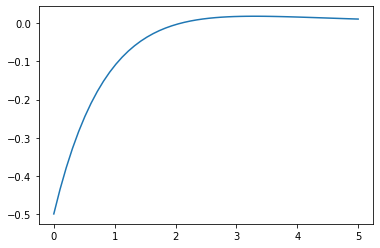

In [22]:
x = np.linspace(0, 5)
y = s(x)

plt.plot(x, y)

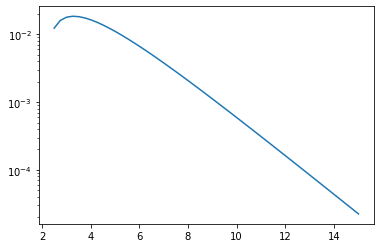

In [23]:
x = np.linspace(2.5, 15)
plt.semilogy(x, s(x))

In [24]:
def f_spherical(x):
    x = np.atleast_2d(x)
    return np.sum(x**2, axis=1)

In [27]:
def select_best(f_obj, x):
    f_vals = f_obj(x)
    return x[np.argmin(f_vals)]


def goa(f_obj, x0, lower, upper, s=s, c_min=4e-5, c_max=1, n_iter=200):
    
    n, d = x0.shape
    x = np.empty((n_iter, n, d))
    t = np.empty((n_iter, d))
    s_terms = np.zeros(n_iter)
    x[0] = x0
    
    target = t[0] = select_best(f_obj, x[0]) 
    for k in range(1, n_iter):
        c = c_max - (k - 1)*(c_max - c_min)/(n_iter - 2)
        for i in range(n):
            x[k, i] = target
            for j in range(n):
                if j == i:
                    continue

                diff = x[k-1, j] - x[k-1, i]
                s_term = s(np.abs(diff))
                s_terms[k] = np.max(s_term)
                x[k, i] += c**2 * (upper - lower)/2 * s_term * diff/max(np.linalg.norm(diff), 1e-6)
                
        x = np.clip(x, lower, upper)
        x_best = select_best(f_obj, x[k])
        if f_obj(x_best) < f_obj(target):
            target = x_best
        t[k] = target
  
    return x, t, s_terms

In [28]:
np.random.seed(1234)
x0 = 200 * np.random.uniform(size=(10, 2)) - 100
#x0 = 200 * np.random.uniform(size=(2, 2)) - 100
#x0 = np.array([[50, 60], [20, 20]])

x, t, s_terms = goa(f_spherical, x0, -100, 100) # x = (T, N, D)

(array([47., 29., 12.,  4.,  2.,  2.,  3.,  2.,  1., 98.]),
 array([-0.49999951, -0.44814953, -0.39629955, -0.34444958, -0.2925996 ,
        -0.24074962, -0.18889964, -0.13704966, -0.08519968, -0.0333497 ,
         0.01850027]),
 <BarContainer object of 10 artists>)

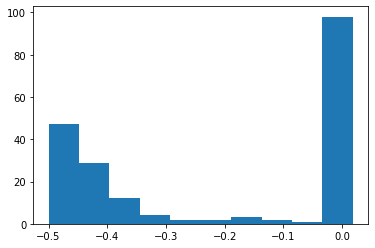

In [29]:
plt.hist(s_terms)

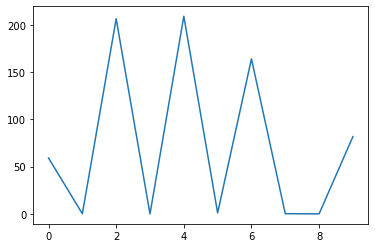

In [15]:
distances = [np.linalg.norm(p[0]-p[1]) for p in x]
plt.plot(distances[:10])


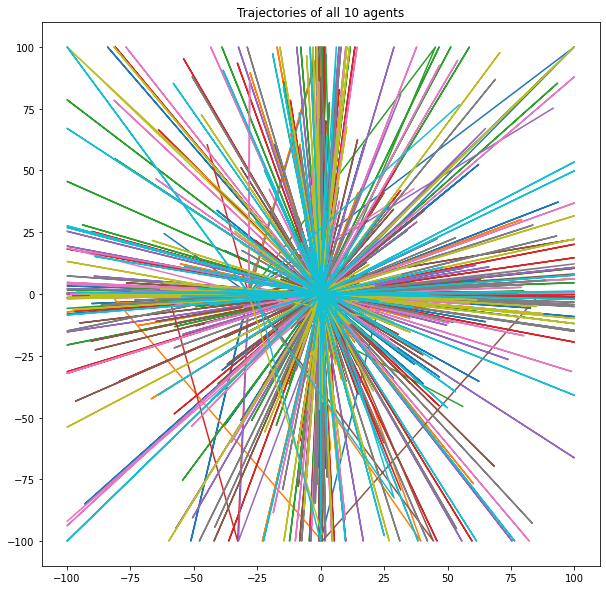

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
for traj in x.transpose(1, 2, 0):
    ax.plot(*traj)
ax.set_title(f"Trajectories of all {x.shape[1]} agents")

pass

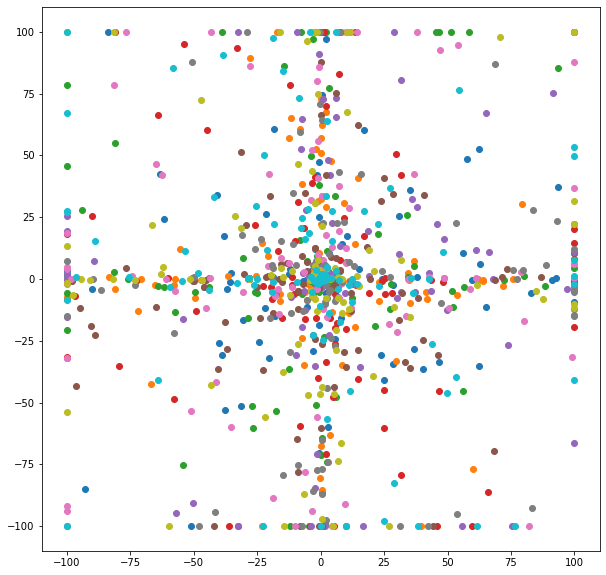

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
for traj in x.transpose(1, 2, 0):
    ax.plot(*traj, 'o')

(-0.25, 0.25)

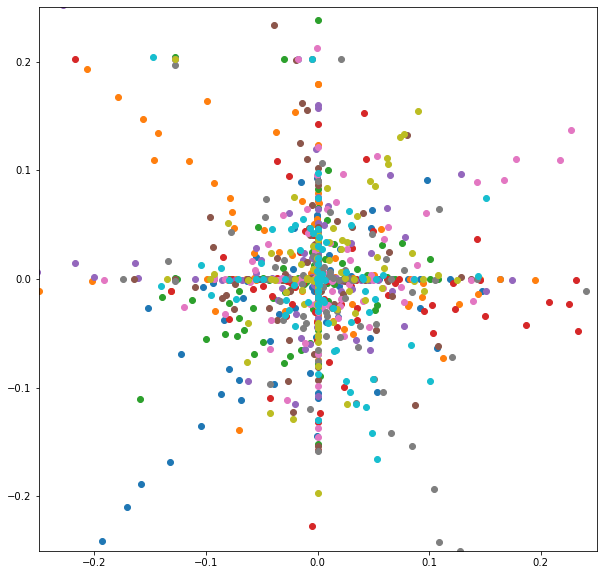

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
for traj in x.transpose(1, 2, 0):
    ax.plot(*traj, 'o')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)

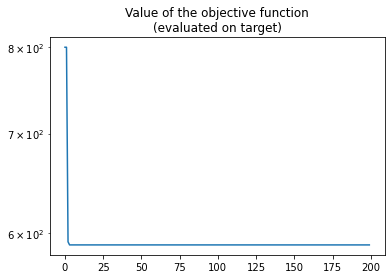

In [13]:
f_vals = [f_spherical(tp) for tp in t]

plt.semilogy(f_vals)
plt.title("Value of the objective function\n(evaluated on target)")

pass

In [42]:
# Stability of the solution w.r.t. to small perturbations of the input
x0 = 200 * np.random.uniform(size=(10, 2)) - 100
ts = []

def generate_perturbations():
    for i in range(10):
        for j in range(2):
            for k in range(1, 6):
                eps = np.zeros((10, 2))
                eps[i, j] = k*1e-7
                yield eps

for eps in generate_perturbations():
    x = x0 + eps
    x, t, _ = goa(f_spherical, x, -100, 100)
    ts.append(t[-1])

In [43]:
ts = np.asarray(ts)
ts.shape

(100, 2)

In [44]:
ts[:20]

array([[ 1.42544807e-04,  1.49365222e-04],
       [-3.33501570e-05,  2.36728437e-05],
       [-1.83877001e-05,  2.59235051e-06],
       [ 3.75641031e-04, -7.65943056e-04],
       [ 6.98765167e-05, -1.56952260e-04],
       [ 7.50555290e-05, -2.83582020e-05],
       [ 2.49491686e-08, -3.96739510e-05],
       [ 9.44116701e-05, -6.64520287e-05],
       [-6.44192725e-04,  8.90111409e-04],
       [-2.34941718e-04,  3.55240518e-04],
       [-4.64322817e-05, -2.88093549e-07],
       [ 2.76738993e-04, -3.55777289e-04],
       [-3.24773801e-05, -3.01319530e-06],
       [-2.02407902e-04, -7.80452821e-06],
       [ 9.26185660e-05, -3.60576424e-04],
       [-1.70550331e-04, -9.62463913e-05],
       [ 3.95903989e-05, -9.30904534e-05],
       [-2.54646713e-04, -2.87663320e-04],
       [-1.43843354e-04, -2.30942653e-05],
       [ 3.84920051e-05,  1.46178953e-05]])

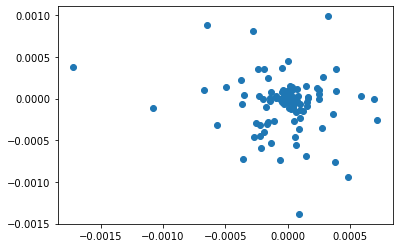

In [45]:
plt.plot(ts[:, 0], ts[:, 1], 'o')